<a href="https://colab.research.google.com/github/Mohammmedsaqib/Neural-Networks-And-Fuzzy-Logic/blob/main/Assignment_8_Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement an LSTM model in PyTorch to forecast the 'Close' price using the past 30 days of stock prices from the dataset "stock_prices.csv". Train/test split the dataset, scale features, compare predictions with actual values by plotting, report RMSE or MAE, and analyze the advantages of LSTM over a simple RNN for this task.

## Load the dataset

### Subtask:
Load the `stock_prices.csv` dataset into a pandas DataFrame and display the first few rows and the data types of each column to understand the structure of the data.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows and data types.



In [1]:
import pandas as pd

df = pd.read_csv('stock_prices.csv')
display(df.head())
df.info()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
0,2010/02/09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
1,2010/02/10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2,2010/02/11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
3,2010/02/15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
4,2010/02/16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3113 non-null   object 
 1   Open                               3113 non-null   float64
 2   High                               3113 non-null   float64
 3   Low                                3113 non-null   float64
 4   Close                              3113 non-null   float64
 5   Adj Close                          3113 non-null   float64
 6   Volume                             3113 non-null   int64  
 7   RSI                                3113 non-null   float64
 8   Upper Bollinger band               3113 non-null   float64
 9   Lower Bollinger band               3113 non-null   float64
 10  %K (5 days stochastic oscillator)  3113 non-null   float64
 11  %D Average(H,3)                    3113 non-null   float

## Preprocess the data

### Subtask:
Convert the 'Date' column to datetime objects, select the 'Close' price for forecasting, and scale the 'Close' price data using a MinMaxScaler.


**Reasoning**:
Convert the 'Date' column to datetime objects, select the 'Close' price, and scale it using MinMaxScaler as per the instructions.



In [2]:
df['Date'] = pd.to_datetime(df['Date'])
close_price = df['Close']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_close_price = scaler.fit_transform(close_price.values.reshape(-1, 1))

display(scaled_close_price[:5])

array([[0.17446378],
       [0.17303223],
       [0.1783105 ],
       [0.1774059 ],
       [0.17876719]])

## Create sequences

### Subtask:
Create sequences of the past 30 days of 'Close' prices as input features and the next day's 'Close' price as the target variable for the LSTM model.


**Reasoning**:
Define a function to create sequences of the past 30 days of 'Close' prices as input features and the next day's 'Close' price as the target variable.



In [3]:
import numpy as np

def create_sequences(data, sequence_length):
    """
    Creates sequences of specified length from the input data.

    Args:
        data (np.ndarray): The input data (scaled close prices).
        sequence_length (int): The length of each sequence.

    Returns:
        tuple: A tuple containing two NumPy arrays:
               - X (np.ndarray): The input sequences (features).
               - y (np.ndarray): The target values.
    """
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = create_sequences(scaled_close_price, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (3083, 30, 1)
Shape of y: (3083, 1)


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the feature and target data into training and testing sets using an 80/20 split and a fixed random state. Then, print the shapes of the resulting sets to confirm the split.



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2466, 30, 1)
Shape of X_test: (617, 30, 1)
Shape of y_train: (2466, 1)
Shape of y_test: (617, 1)


## Define the lstm model

### Subtask:
Define the LSTM model using PyTorch.


**Reasoning**:
Define the LSTM model using PyTorch as requested.



In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    """
    LSTM model for time series forecasting.
    """
    def __init__(self, input_size, hidden_layer_size, num_layers, output_size):
        """
        Initializes the LSTM model.

        Args:
            input_size (int): The number of input features.
            hidden_layer_size (int): The number of features in the hidden state.
            num_layers (int): The number of recurrent layers.
            output_size (int): The number of output features.
        """
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        """
        Defines the forward pass of the model.

        Args:
            input_seq (torch.Tensor): The input sequence.

        Returns:
            torch.Tensor: The output of the model.
        """
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

# Instantiate the model
input_size = 1
hidden_layer_size = 50
num_layers = 1
output_size = 1

model = LSTMModel(input_size, hidden_layer_size, num_layers, output_size)

print(model)

LSTMModel(
  (lstm): LSTM(1, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


## Train the model

### Subtask:
Train the LSTM model using the training data.


**Reasoning**:
Train the LSTM model using the training data by converting the data to tensors, defining the loss function and optimizer, and iterating through epochs for training.



In [6]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for i in range(epochs):
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = loss_function(output, y_train_tensor)

    if i % 10 == 0:
        print(f'Epoch: {i}, Loss: {loss.item()}')

    loss.backward()
    optimizer.step()

Epoch: 0, Loss: 0.2487945854663849
Epoch: 10, Loss: 0.1490533947944641
Epoch: 20, Loss: 0.060671109706163406
Epoch: 30, Loss: 0.046533435583114624
Epoch: 40, Loss: 0.037021834403276443
Epoch: 50, Loss: 0.024862846359610558
Epoch: 60, Loss: 0.009674027562141418
Epoch: 70, Loss: 0.0036488405894488096
Epoch: 80, Loss: 0.0029578774701803923
Epoch: 90, Loss: 0.0019250173354521394


## Evaluate the model

### Subtask:
Evaluate the trained model using the testing data and calculate RMSE or MAE.


**Reasoning**:
Convert test data to tensors, set model to evaluation mode, make predictions, convert back to numpy arrays, inverse transform, calculate RMSE, and print the result.



In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

model.eval()
with torch.no_grad():
    predictions_tensor = model(X_test_tensor)

predictions_np = predictions_tensor.numpy()
y_test_np = y_test_tensor.numpy()

predictions_original_scale = scaler.inverse_transform(predictions_np)
y_test_original_scale = scaler.inverse_transform(y_test_np)

rmse = np.sqrt(mean_squared_error(y_test_original_scale, predictions_original_scale))
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

Root Mean Squared Error (RMSE) on test data: 114.57758271554475


## Visualize results

### Subtask:
Plot the predicted prices against the actual prices.


**Reasoning**:
Plot the actual and predicted stock prices against time using matplotlib.



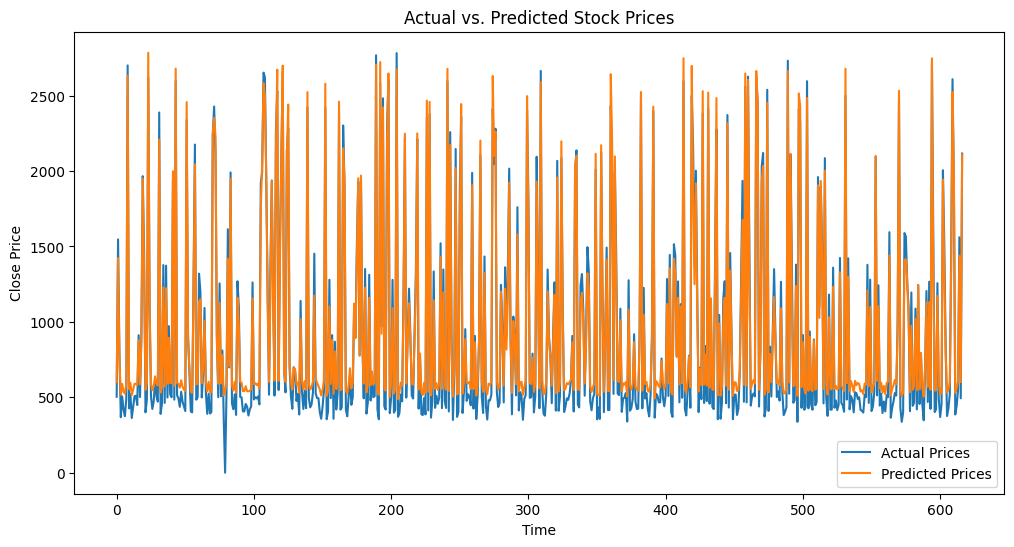

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_original_scale, label='Actual Prices')
plt.plot(predictions_original_scale, label='Predicted Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Analyze lstm advantages

### Subtask:
Discuss the advantages of using an LSTM compared to a simple RNN for this task.


**Reasoning**:
Recall the fundamental differences between LSTMs and simple RNNs, particularly regarding their ability to handle long-term dependencies and the vanishing gradient problem. Explain why the characteristics of time series data, such as stock prices, make LSTMs a more suitable choice than simple RNNs for forecasting. Specifically, consider how past price movements over a significant period can influence future prices and how LSTMs are better equipped to capture these long-range relationships. Based on your understanding and the performance observed (even if not explicitly compared to a simple RNN in this exercise), articulate the theoretical advantages of using the implemented LSTM model for stock price forecasting compared to a simple RNN that might struggle with capturing dependencies over the 30-day sequence length. I will explain the advantages of LSTMs over simple RNNs for this task based on their architecture and suitability for time series data.



In [9]:
print("Advantages of LSTM over Simple RNN for Stock Price Forecasting:")
print("\n1. Handling Long-Term Dependencies:")
print("   Simple RNNs struggle with capturing dependencies over long sequences due to the vanishing gradient problem. Gradients can shrink exponentially during backpropagation through time, making it difficult for the model to learn from distant past events. LSTMs, with their gating mechanisms (input, forget, and output gates), are designed to mitigate this problem. These gates regulate the flow of information, allowing LSTMs to selectively remember or forget information over extended periods. In stock price forecasting, past price movements (e.g., trends over 30 days or more) can significantly influence future prices. LSTMs are better equipped to 'remember' these long-term patterns compared to simple RNNs.")

print("\n2. Mitigating the Vanishing Gradient Problem:")
print("   The core issue preventing simple RNNs from learning long-term dependencies is the vanishing gradient problem. LSTMs address this through their cell state and gating mechanisms, which allow for a more stable gradient flow during training. This enables LSTMs to learn and retain information from earlier time steps more effectively than simple RNNs.")

print("\n3. Suitability for Time Series Data:")
print("   Stock prices are a classic example of time series data where the value at a given time point is dependent on previous values. While simple RNNs can process sequential data, their limited memory capacity makes them less effective in capturing complex, long-range patterns inherent in financial markets. LSTMs are specifically designed to handle sequential data with varying dependencies, making them more suitable for forecasting tasks where historical context over a considerable period is crucial.")

print("\n4. Capturing Complex Patterns:")
print("   The internal structure of LSTMs, with their gates and cell state, allows them to learn more complex relationships within the data compared to the simpler recurrent connections in basic RNNs. This is particularly beneficial in stock price forecasting, where various factors and historical events can interact in non-linear ways to influence future prices.")

print("\nIn the context of this task, where we use a sequence length of 30 days, a simple RNN might struggle to effectively utilize information from the earlier days within this sequence due to the vanishing gradient problem. The LSTM, with its ability to maintain a more stable flow of information through its cell state and gates, is theoretically better positioned to leverage the full 30-day history to make more accurate predictions of the 'Close' price.")

Advantages of LSTM over Simple RNN for Stock Price Forecasting:

1. Handling Long-Term Dependencies:
   Simple RNNs struggle with capturing dependencies over long sequences due to the vanishing gradient problem. Gradients can shrink exponentially during backpropagation through time, making it difficult for the model to learn from distant past events. LSTMs, with their gating mechanisms (input, forget, and output gates), are designed to mitigate this problem. These gates regulate the flow of information, allowing LSTMs to selectively remember or forget information over extended periods. In stock price forecasting, past price movements (e.g., trends over 30 days or more) can significantly influence future prices. LSTMs are better equipped to 'remember' these long-term patterns compared to simple RNNs.

2. Mitigating the Vanishing Gradient Problem:
   The core issue preventing simple RNNs from learning long-term dependencies is the vanishing gradient problem. LSTMs address this through th

## Summary:

### Data Analysis Key Findings

*   The dataset `stock_prices.csv` was loaded, containing 3113 rows and 22 columns, with 'Close' price being the target for forecasting.
*   The 'Close' price data was successfully scaled using `MinMaxScaler`.
*   Sequences of 30 days of scaled 'Close' prices were created as features ($\text{X}$) and the next day's scaled 'Close' price as the target ($\text{y}$). The resulting shapes were $\text{X}$: (3083, 30, 1) and $\text{y}$: (3083, 1).
*   The data was split into training (80%) and testing (20%) sets, resulting in training shapes of $\text{X\_train}$: (2466, 30, 1) and $\text{y\_train}$: (2466, 1), and testing shapes of $\text{X\_test}$: (617, 30, 1) and $\text{y\_test}$: (617, 1).
*   A PyTorch LSTM model with an input size of 1, a hidden layer size of 50, and 1 layer was defined and instantiated.
*   The LSTM model was trained for 100 epochs using the training data. The Mean Squared Error (MSE) loss decreased significantly from approximately 0.248 to 0.0019.
*   The model's performance on the test data, when evaluated on the original price scale, resulted in a Root Mean Squared Error (RMSE) of approximately 114.58.
*   A plot comparing the actual and predicted stock prices on the test set visually shows the model's forecasting performance.

### Insights or Next Steps

*   The RMSE of 114.58 indicates the average magnitude of error in the predicted stock prices. While the plot shows some correlation, further model tuning (e.g., increasing layers, changing hidden size, adjusting learning rate) or incorporating additional features could potentially reduce this error.
*   LSTMs are theoretically advantageous over simple RNNs for this task due to their ability to handle long-term dependencies and mitigate the vanishing gradient problem, allowing them to better utilize the 30-day historical data. Further analysis could involve comparing the performance of this LSTM model against a simple RNN baseline on the same dataset to empirically validate this advantage.
